In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use ("dark_background")

In [2]:
dataset = pd.read_csv ('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


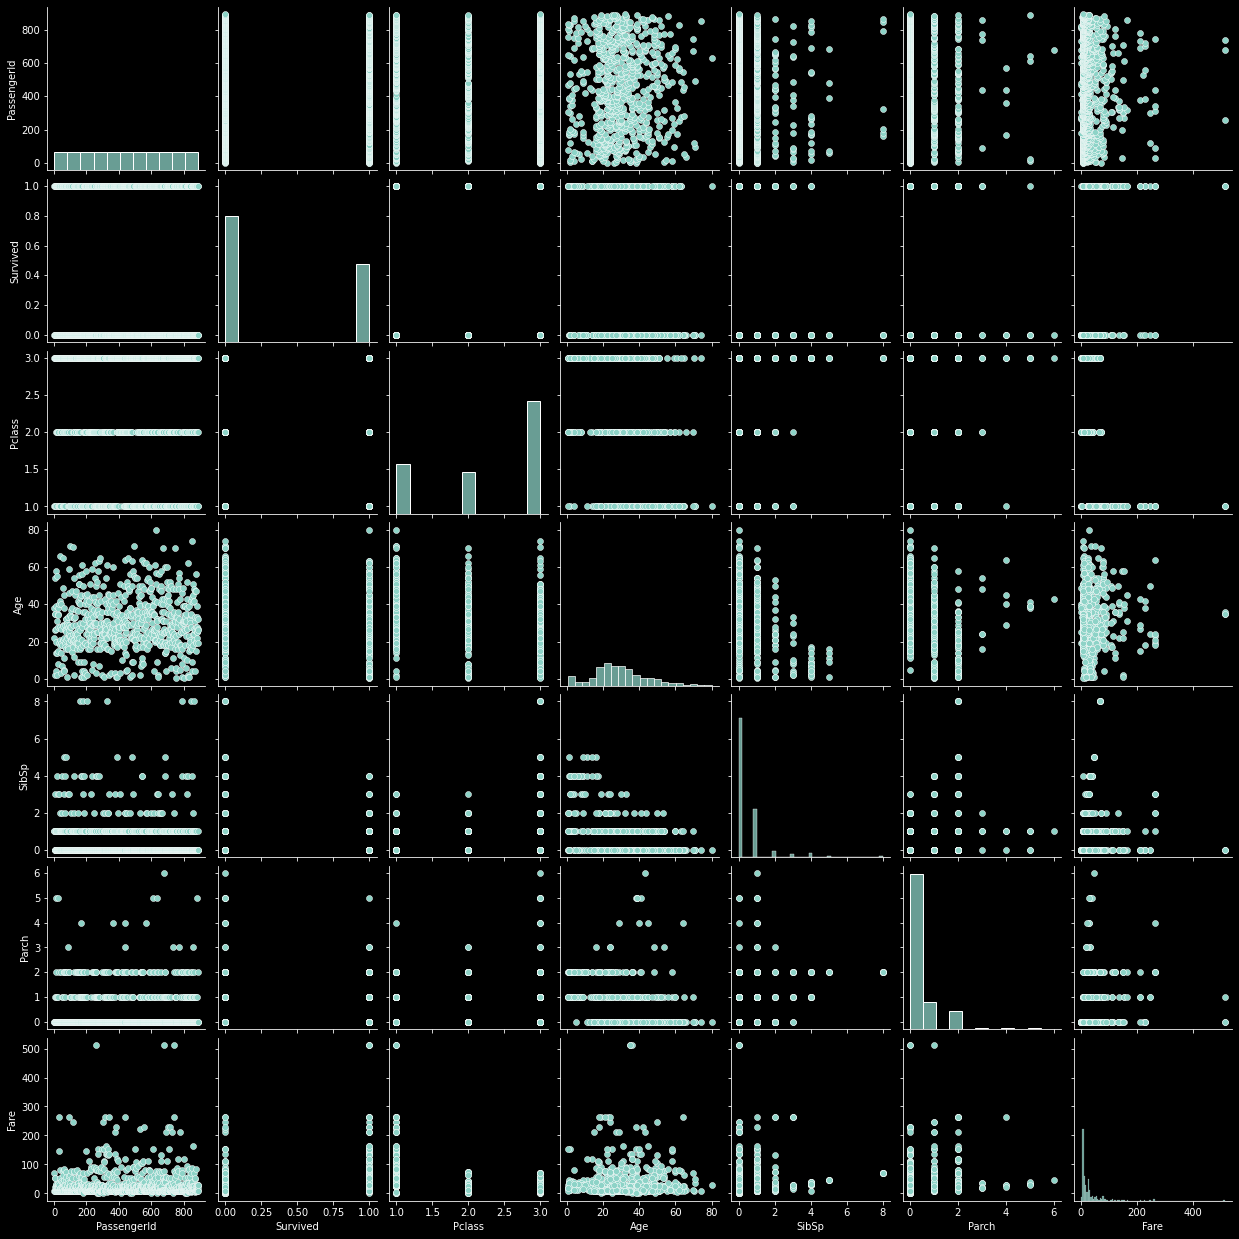

In [3]:
sns.pairplot(dataset)

In [4]:
dataset.info()
dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
dataset.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [6]:
x = dataset.iloc[:,1:].values
print(x)

[[3 'male' 22.0 ... 0 7.25 'S']
 [1 'female' 38.0 ... 0 71.2833 'C']
 [3 'female' 26.0 ... 0 7.925 'S']
 ...
 [3 'female' nan ... 2 23.45 'S']
 [1 'male' 26.0 ... 0 30.0 'C']
 [3 'male' 32.0 ... 0 7.75 'Q']]


In [7]:
y = dataset.iloc[:,0].values
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer (missing_values = np.NaN , strategy = 'most_frequent')
imputer = imputer.fit(x[:,2:])
x[:,2:] = imputer.transform(x[:,2:])

In [9]:
df = pd.DataFrame(x , columns=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'] )
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.25,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.925,S
3,1,female,35.0,1,0,53.1,S
4,3,male,35.0,0,0,8.05,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0,S
887,1,female,19.0,0,0,30.0,S
888,3,female,24.0,1,2,23.45,S
889,1,male,26.0,0,0,30.0,C


In [10]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    891 non-null    object
 1   Sex       891 non-null    object
 2   Age       891 non-null    object
 3   SibSp     891 non-null    object
 4   Parch     891 non-null    object
 5   Fare      891 non-null    object
 6   Embarked  891 non-null    object
dtypes: object(7)
memory usage: 48.9+ KB
None


In [11]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
LE = LabelEncoder ()
x[:,1] = LE.fit_transform(x[:,1])
x[:,6] = LE.fit_transform(x[:,6])

In [12]:
SC = StandardScaler()
x[:,2:3] = SC.fit_transform(x[:,2:3])
x[:,5:6] = SC.fit_transform(x[:,5:6])

In [13]:
df_1 = pd.DataFrame(x , columns=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'] )
df_1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.497793,1,0,-0.502445,2
1,1,0,0.715048,1,0,0.786845,0
2,3,0,-0.194583,0,0,-0.488854,2
3,1,0,0.48764,1,0,0.42073,2
4,3,1,0.48764,0,0,-0.486337,2
...,...,...,...,...,...,...,...
886,2,1,-0.11878,0,0,-0.386671,2
887,1,0,-0.725201,0,0,-0.044381,2
888,3,0,-0.346188,1,2,-0.176263,2
889,1,1,-0.194583,0,0,-0.044381,0


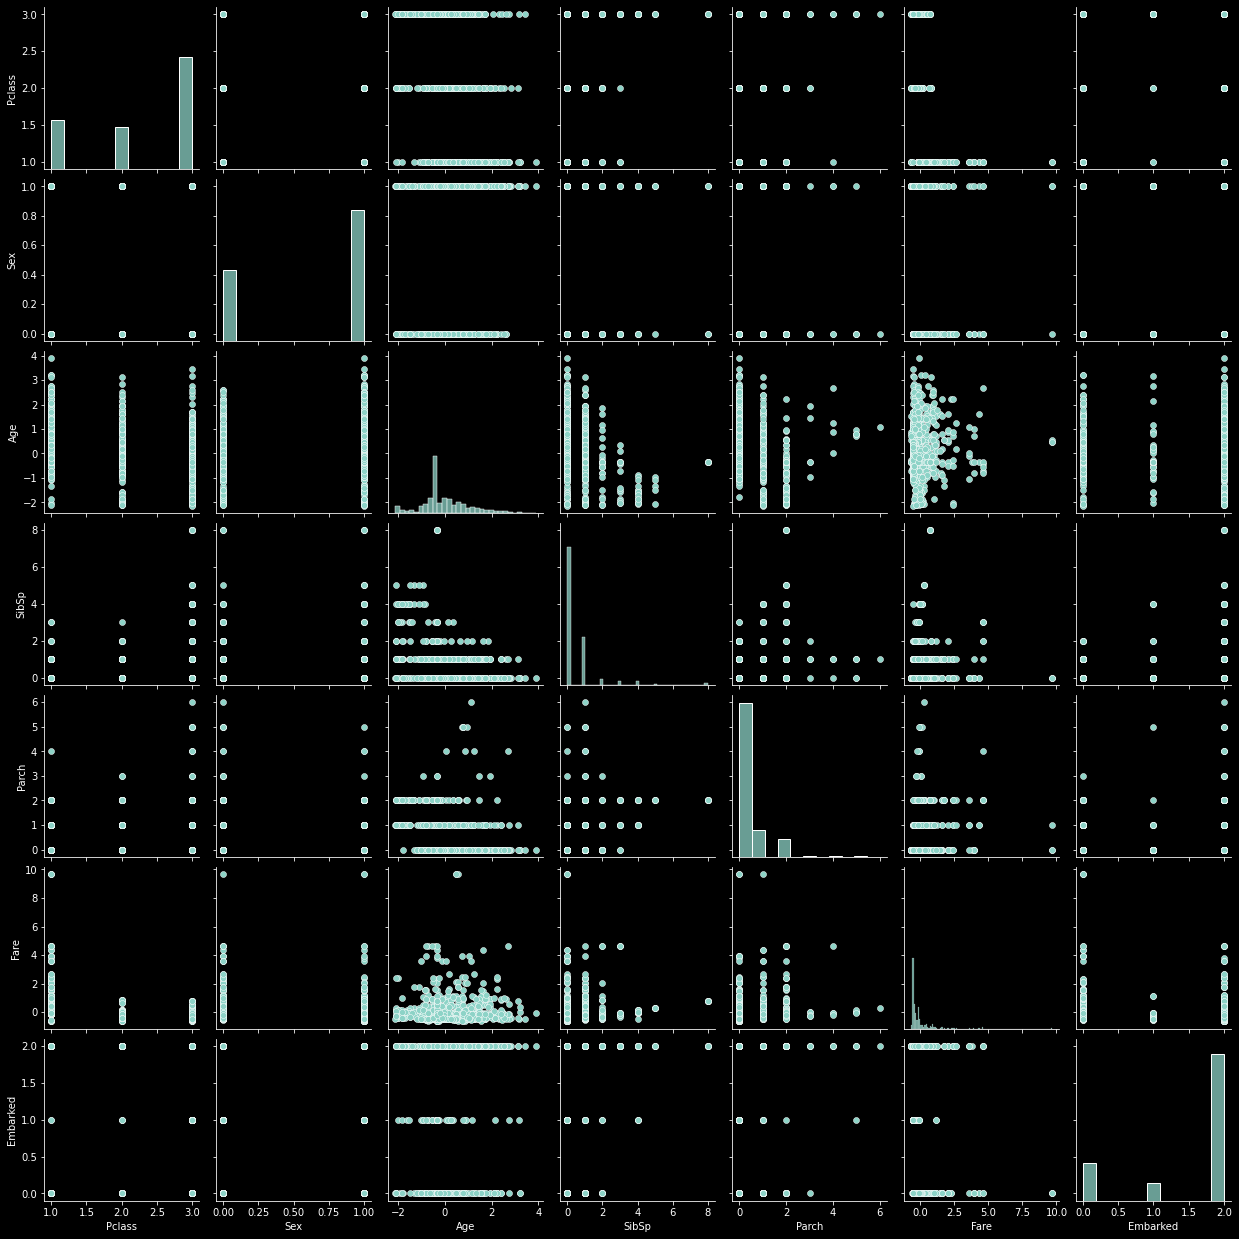

In [14]:
sns.pairplot(df_1)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (x ,y ,test_size = 0.2 ,random_state = 0)

In [16]:
print(x_train)

[[3 0 -0.3461881014312153 ... 2 -0.3414522396297103 0]
 [2 1 0.18442998250887324 ... 0 -0.43700743807979686 2]
 [2 1 0.18442998250887324 ... 1 0.09664633805084172 0]
 ...
 [3 1 -0.3461881014312153 ... 0 -0.49271407711891657 1]
 [3 0 0.5634428996089365 ... 0 -0.29807809649237277 2]
 [2 1 2.38270490168924 ... 1 0.13683114673782454 2]]


In [17]:
print(x_test)

[[3 1 -0.3461881014312153 ... 0 -0.3573083057891445 0]
 [3 1 -0.3461881014312153 ... 0 -0.49640476528021726 2]
 [3 1 -1.6348320195714303 ... 1 -0.06199888922968463 1]
 ...
 [1 0 0.18442998250887324 ... 0 1.6323350375212924 0]
 [3 1 -0.4219906848512279 ... 0 -0.4902797934380587 2]
 [3 1 -0.7252010185312785 ... 0 -0.4863374216869257 2]]


In [18]:
print(y_train)

[0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1
 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0
 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1
 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1
 1 0 0 0 1 0 0 1 0 0 0 0 

In [19]:
print(y_test)

[0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [20]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(y_pred)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [22]:
df_comp = pd.DataFrame({'Actual':y_test , 'Predict':y_pred})
df_comp

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
174,1,1
175,0,0
176,1,1
177,0,0


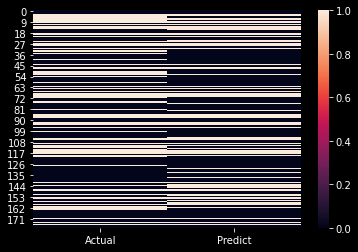

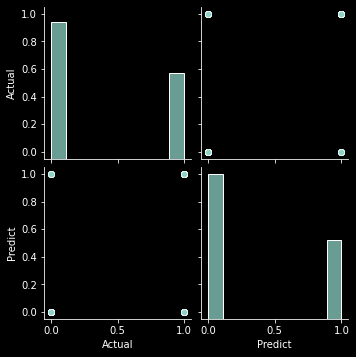

In [23]:
sns.heatmap(df_comp)
sns.pairplot(df_comp)

In [24]:
df_test = pd.DataFrame(y_test , columns=['Survived'] )
df_test

,Survived
0,0
1,0
2,0
3,1
4,1
...,...
174,1
175,0
176,1
177,0


In [25]:
df_pred = pd.DataFrame(y_pred , columns=['Survived'] )
df_pred

,Survived
0,0
1,0
2,0
3,1
4,1
...,...
174,1
175,0
176,1
177,0


In [26]:
print ('y_test = ',df_test.sum())
print ('y_pred = ',df_pred.sum())


y_test =  Survived    69
dtype: int64
y_pred =  Survived    63
dtype: int64


([<matplotlib.patches.Wedge at 0x193947c7eb0>,
 [Text(-1.0295673411328599, 0.38728683178312895, 'Survived'),
  Text(1.0295673411328596, -0.38728683178312956, 'UnSurvived')],
 [Text(-0.5615821860724689, 0.2112473627907976, '39%'),
  Text(0.5615821860724688, -0.21124736279079792, '61%')])

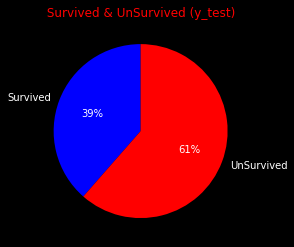

In [27]:
data = [69,110]
names = ['Survived','UnSurvived']
plt.title (' Survived & UnSurvived (y_test) ',color = 'red')
#plt.style.use ("dark_background")
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

([<matplotlib.patches.Wedge at 0x193948186d0>,
 [Text(-0.9831562858144204, 0.49335962305765774, 'Survived'),
  Text(0.9831562858144205, -0.4933596230576574, 'UnSurvived')],
 [Text(-0.5362670649896838, 0.26910524894054055, '35%'),
  Text(0.5362670649896838, -0.2691052489405404, '65%')])

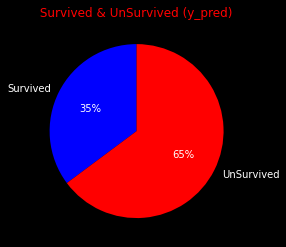

In [28]:
data = [63,116]
names = ['Survived','UnSurvived']
plt.title (' Survived & UnSurvived (y_pred) ',color = 'red')
#plt.style.use ("dark_background")
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)